# Content:

* [Overview and Problem Definition](#overview)
* [Part One : Understanding the Datasets ](#part1)
* [Part Two : Exploring Fandango Ratings vs Stars](#part2)
* [Part Three : Further Analysis on Fandanga Dataset ](#part3)
* [Part Four : Comparison of Fandango Ratings to Other Sites](#part4)


## Overview and Problem Definition
<a id="overview"></a>

It is a common practice for many people to have a look (at least a quick one) at the movie ratings (or reviews) on various platforms if they are planning to go out to see a movie hoping this will help them to avoid wasting time and money.

But what if the reviews are biased? This could become even a bigger concern in the case that the same company showing the rating *also* makes money by selling movie tickets. Wouldn't that grow a possible conflict of interest?

In 2015, fivethirtyeight (also known as 538, an American website famous for opinion poll analysis, politics and sports analysis and statistics) published an article regarding Fandango's movie ratings. Fandango is a ticketing company in US and they sell movie tickets via their website [fandango.com](http://fandango.com). In addition to selling tickets, they also provide rating of the movies for which they are selling the tickets. 

According to the article of fivethirtyeight, it is nearly impossible for a movie to "fail" by Fandango standards (stars) and the average rating of a movie on Fandango is much higher compared to other movie rating websites (such as IMDB). Whats more, there seems a significant difference between the ratings - which are embedded in HTLM code of the website - and the stars which are actually displayed on the mainpage of the website. The disparity seems significant enough to call it more than an innocent error.

In this project, I will be using the data which has been scraped by fivethirtyeight to see I am able to reach the same results as claimed. In [Part Two](#part2) of the study, the difference between ratings and stars on Fandango website will be evaluated and in [Part Four](#part4), the comparison between Fandango and other movie rating websites will be made. 

<img src="538ss.jpg" style="height:150px">


*Please note;*

This is the article behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) 
This study has been prepared as a capstone project for Jose Portilla's Data Science course.


## Part One: Understanding the Datasets
<a id="part1"></a>


The datasets are openly available on fivethirtyeight.com's github page: https://github.com/fivethirtyeight/data. 

There are two csv files, one with Fandango Stars and Rating, and the other with aggregate data for movie ratings from other sites, like Metacritic, IMDB, and Rotten Tomatoes.

`all_sites_scores.csv` contains every movie that has a RottenTomatoes (critics) rating, a RottenTomatoes User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango.

`fandango_scrape.csv` contains every movie which fivethirtyeight.com pulled from Fandango.

The features of the both datasets (including the data type info) are shown below in table format;

<table style="display: inline-block">
<caption style="text-align: center"><strong>all_sites_scores data</strong></caption>
<tr><th>Column Name</th><th>Description</th><th>dtype</th></tr>
<tr><td>FILM</td><td>movie title</td><td>categorical</td></tr>
<tr><td>RottenTomatoes</td><td>Rotten Tomatoes "Tomatometer" score for the movie</td><td>integer</td></tr>
<tr><td>RottenTomatoes_User</td><td>Rotten Tomatoes user score for the movie</td><td>integer</td></tr>
<tr><td>Metacritic</td><td>Metacritic critic score for the movie</td><td>integer</td></tr>
<tr><td>Metacritic_User</td><td>Metacritic user score for the movie</td><td>float</td></tr>
<tr><td>IMDB</td><td>IMDb user score for the movie</td><td>float</td></tr>
<tr><td>Metacritic_user_vote_count</td><td>number of user votes on Metacritic</td><td>integer</td></tr>
<tr><td>IMDB_user_vote_count</td><td>number of user votes on IMDb</td><td>integer</td></tr>


<table style="display: inline-block">
<caption style="text-align: center"><strong>fundango_scrape data</strong></caption>
<tr><th>Column Name</th><th>Description</th><th>dtype</th></tr>
<tr><td>FILM</td><td>movie title</td><td>categorical</td></tr>
<tr><td>STARS</td><td>number of stars on Fandango.com mainpage</td><td>float</td></tr>
<tr><td>RATING</td><td>Fandango ratingValue for the film-retrieved from the HTML of each page</td><td>float</td></tr>
<tr><td>VOTES</td><td>number of people who had reviewed the film-at the time data was scraped</td><td>integer</td></tr>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part Two : Exploring Fandango Ratings vs Stars
<a id="part2"></a>

Let's first explore the Fandango ratings and stars to see if our analysis agrees with the article's conclusion.


In [25]:
fandango = pd.read_csv("fandango_scrape.csv")

In [83]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [84]:
fandango.tail()

,FILM,STARS,RATING,VOTES
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0
503,Zarafa (2012),0.0,0.0,0


In [85]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


---
Although there seems no null values in any column of the data, there might be significant number of zero values in `votes` column which is also indicated by `tail()` results. 
These represent the movies which have no votes on them and should be eliminated from the analysis so that the statistics (such as mean or median) wont be destorted by those zero values.

*Please also note that an alternative method to search for zero values in the dataframe will be shown and utilized in [Part Four](#part4)*

Lets have a look how many zero values there are in `votes`column:

In [26]:
sum(fandango["VOTES"]==0)

69

In [27]:
#filtering out zero values from the main dataframe found in VOTES column:
fandango = fandango[~(fandango["VOTES"]==0)]

---
We can now explore if there is really a discrepancy between the stars shown on Fandango main page and the real rating available on the html of the page.

In [131]:
np.round(fandango.describe().transpose(),2).drop("VOTES")

,count,mean,std,min,25%,50%,75%,max
STARS,435.0,4.12,0.71,1.0,3.5,4.0,4.5,5.0
RATING,435.0,3.91,0.69,1.0,3.5,4.0,4.4,5.0


Please note that `votes` column has been excluded from the summary statistics as it's not relevant for the comparison.

It can be seen from the statistics that there is discrepancy between the "actual" ratings (available on site HTML) and the ones shown on the mainpage. This result is inline with article's conclusion.

A plot might be handy to display the distribution of ratings displayed `(stars)` versus what the true rating was from votes `(rating)`.

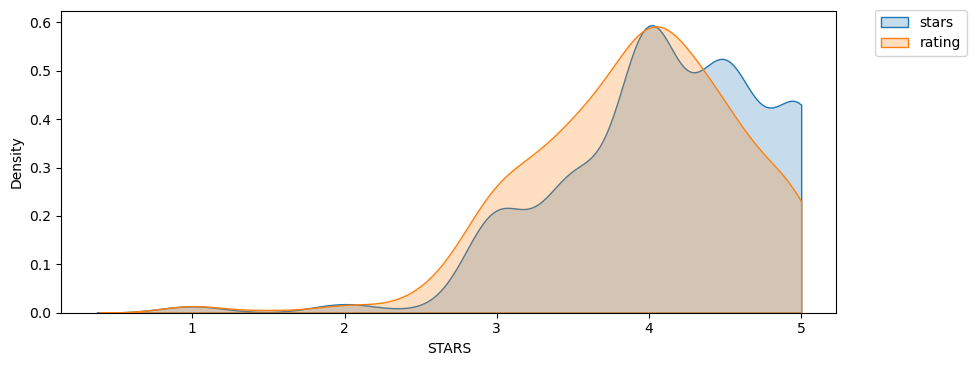

In [127]:
plt.figure(figsize=(10,4), dpi=100)
sns.kdeplot(data=fandango,x="STARS",label="stars",clip=[0,5],shade=True,)
sns.kdeplot(data=fandango,x="RATING",label="rating",clip=[0,5],shade=True)
#better to clip the values btw. 0-5 as kde works on the assumption of gaussian distribution so can generate non-existing values.
plt.legend(loc=(1.05,0.85));

As also seen on the plot, the stars gravitate more towards to the right side compared to ratings which is another evidence of the inflation.

Let's even quantify this discrepancy by creating a new column consisting of the numerical differences between `stars` and the `rating`.

In [5]:
fandango["STARS-DIFF"]=np.round(fandango["STARS"]-fandango["RATING"],1)

In [134]:
#a quick look to the dataframe with new column added;
fandango.head(3)

,FILM,STARS,RATING,VOTES,STARS-DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1
1,Jurassic World (2015),4.5,4.5,34390,0.0
2,American Sniper (2015),5.0,4.8,34085,0.2


With the added column to the dataframe, the number of times a certain difference occurs can be displayed as well;

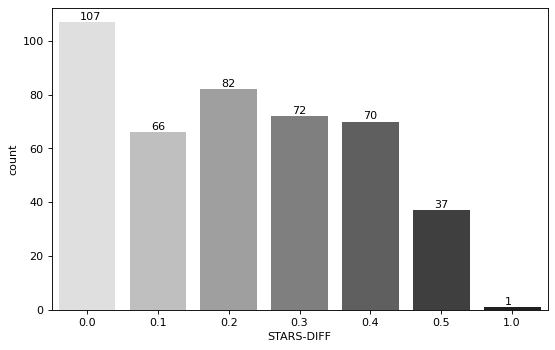

In [167]:
plt.figure(figsize=(8,5),dpi=80)
ax = sns.countplot(data=fandango, x="STARS-DIFF",palette="binary")
#as annotation is not a default option in seaborn countplot, it needs to be added by coding and needs to be customized.  
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.3, p.get_height()+1))


The countplot also shows that there is a significant amount of movies on the website which have different ratings than the actual user ratings. 
37 movies having 0.5 scale difference also implies that, this issue is not related only with a simple rounding error.

---
## Part Three : Further Analysis on Fandanga Dataset
<a id="part3"></a>

Lets dive a bit deeper to the fanfango dataset and try to extract some insight out of it which could help for the further steps.



> **Q1** - Is there a relationship between popularity of a film and its rating?
---

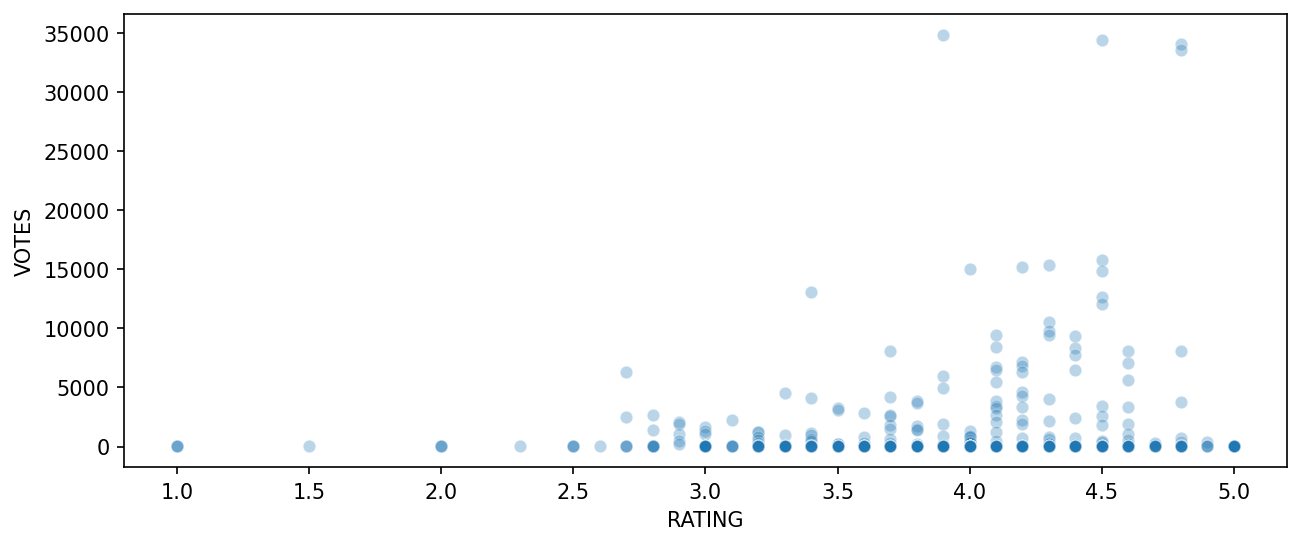

In [13]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango,x='RATING',y='VOTES', alpha=0.3);

As can be seen on the scatterplot, the points along rating-votes axis is dispersed there seems no relationship between those variables.

Lets try to verify that by the correlation values between the columns;

In [90]:
fandango.corr(method="spearman")

,STARS,RATING,VOTES
STARS,1.000000,0.969840,0.081931
RATING,0.969840,1.000000,0.036925
VOTES,0.081931,0.036925,1.000000


The default correlation type is Pearson on pandas library, but it makes more sense to use Spearman for this case, as the ratings and stars columns represent ordinal data.

The low correlation coefficient (0,037) also suggests there is no linear relationship between rating and the votes.

The *im*perfect correlation (lower than 1.0) between stars and rating also shows there is some difference between the stars being shown to a user versus the true numerical rating on the website.


*Please also note that we could have used `stars` column that consists of .0 or .5 values - which would allow us to treat them as ordinal data and plot the values in a swarm plot which would depict the figure with exact number of data points unlike scatter plot (this drawback has been reduced to some extent by reducing the opacity for the above scatter plot).*

*But, as we have already found out that the `stars` column does not represent real ratings, we should stick with the `rating` column for this case. In addition, we might have faced problems regarding the size while using the swarm plot.*

---
> **Q2** - How many movies are in the Fandango DataFrame per year?
---

The year data is *not* available as a separate column in the dataframe. This has to be retrieved from the `film` column which has the format as below:

    Film Title Name (Year)

So let's create a function and then apply it to the relevant `film` column by `apply` method in order to get a new column with the year info. (Another option would be to do this by str methods by passing a lambda function)

In [196]:
def ret_year(year):
    year=year[-5:-1] #grab only the year info from the string by location
    return year

In [197]:
fandango["YEAR"]=fandango["FILM"].apply(ret_year)

In [198]:
#a quick look to the dataset with the YEAR column;
fandango.head()

,FILM,STARS,RATING,VOTES,STARS-DIFF,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,0.1,2015
1,Jurassic World (2015),4.5,4.5,34390,0.0,2015
2,American Sniper (2015),5.0,4.8,34085,0.2,2015
3,Furious 7 (2015),5.0,4.8,33538,0.2,2015
4,Inside Out (2015),4.5,4.5,15749,0.0,2015


In [173]:
#to see the number of movies per year;
fandango["YEAR"].value_counts()

2015    411
2014     23
2016      1
Name: YEAR, dtype: int64

Although this data (amount of movies per year) is easy to digest, it usually makes sense to make it visual as well.

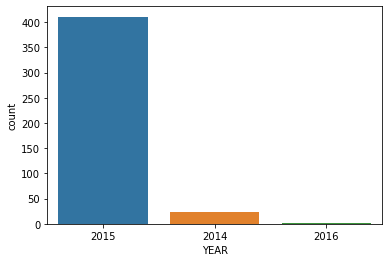

In [174]:
sns.countplot(data=fandango, x="YEAR");

---
> **Q3**: What are the 10 movies with the highest number of votes?
---

In [91]:
fandango.sort_values(by="VOTES",ascending=False).set_index("FILM").iloc[:10,:]

,STARS,RATING,VOTES,STARS-DIFF,YEAR
FILM,,,,,
Fifty Shades of Grey (2015),4.0,3.9,34846,0.1,2015
Jurassic World (2015),4.5,4.5,34390,0.0,2015
American Sniper (2015),5.0,4.8,34085,0.2,2015
Furious 7 (2015),5.0,4.8,33538,0.2,2015
Inside Out (2015),4.5,4.5,15749,0.0,2015
The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2,2014
Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3,2015
Minions (2015),4.0,4.0,14998,0.0,2015
Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015


---

## Part Four : Comparison of Fandango Ratings to Other Sites
<a id="part4"></a>

In this last part of the study, a comparison between the scores from Fandango and other movies sites (such as IMDB) will be drawn.

Let's start by importing the relevant file and having a quick look;

In [230]:
allsites = pd.read_csv("all_sites_scores.csv")

In [191]:
allsites.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660


In [9]:
allsites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


As it was the case in [Part Two](#part2) where zero values in `votes` column did not add anything meaningful to the data (and even had the potential of destorting it), the zero values have to be handled in `allsites` data as well.
Although `allsites` data consist of only 146 rows and it is relatively easy to detect any flaw within the dataframe, that will not be always the case. So better to be equipped with the knowledge how to handle those.

First, let's see if there is any zero value within the dataframe and address it. Then we may dive deeper on column level.

In [94]:
allsites[(allsites==0).any(axis=1)]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count


The output shows that there are no zero values within the dataframe so there is no need to work separately on any column in that sense.

#### Combining the Datasets

Let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales by comparing it with the other sites. In order to do that, a combined dataframe would be needed.

Please note that not every movie in the `fandango` dataframe can be found in the `allsites` dataframe, since some Fandango movies have very little or no reviews. Just to compare movies that exist in both dataframes, an *`inner`* merge will be applied to combine dataframes based on the `film` columns.

Although it will be relatively easy to distinguish the columns coming from two different dataframes for this case, using a `suffix` will be helpful anyway. As merge method allows only the columns which have the same name to be suffixed, we will force a suffix before the merging with a lambda function. The `stars_diff` column in `fandango` dataframe will also be dropped as it will not be used for further analysis.

In [200]:
fandango.drop("STARS-DIFF", axis=1, inplace=True)

In [231]:
combined = allsites.merge(fandango.rename(columns=lambda x:x+"_f" if x!="FILM" else x))

In [232]:
combined.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,STARS_f,RATING_f,VOTES_f,YEAR_f
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,5.0,4.5,14846,2015
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5.0,4.5,12640,2015
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,5.0,4.5,12055,2015


#### Normalizing the Ratings

Please notice that RottenTomatoes, Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. 

In order to do a fair comparison, we need to **normalize** these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

It's also crucial to notice that IMBD uses 0-10 scaling while RottenTomatoes and Metacritic both use 0-100 scalings.
Rather than applying a normalization function to every relevant column separately, we should build an algorithm which is able to distinguish the scalings and apply the normalization accordingly.


In [233]:
from pandas.api.types import is_numeric_dtype
#for loop for normalization to 0-5 scaling

for feature_name in combined.columns:
    if is_numeric_dtype(combined[feature_name])==True:
        if (combined[feature_name].max()>10) and (combined[feature_name].max()<=100):
            combined[feature_name]=np.round(combined[feature_name]/20,1)
            
        elif (combined[feature_name].max()<=10) and (combined[feature_name].max()>5):
            combined[feature_name]=np.round(combined[feature_name]/2,1)

In [234]:
#a quick look to the new combined dataframe:
combined.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,STARS_f,RATING_f,VOTES_f,YEAR_f
0,Avengers: Age of Ultron (2015),3.7,4.3,3.3,3.6,3.9,1330,271107,5.0,4.5,14846,2015
1,Cinderella (2015),4.2,4.0,3.4,3.8,3.6,249,65709,5.0,4.5,12640,2015
2,Ant-Man (2015),4.0,4.5,3.2,4.0,3.9,627,103660,5.0,4.5,12055,2015
3,Do You Believe? (2015),0.9,4.2,1.1,2.4,2.7,31,3136,5.0,4.5,1793,2015
4,Hot Tub Time Machine 2 (2015),0.7,1.4,1.4,1.7,2.6,88,19560,3.5,3.0,1021,2015


We can now create a dataframe which consists of only normalized ratings for further analysis:

In [236]:
combined.set_index("FILM", inplace=True)
df_norm=combined.loc[:,(combined.dtypes!="object")] #creates a dataframe with only numerical values
df_norm=df_norm.loc[:,((df_norm>=0) & (df_norm<=5)).any()] #creates a dataframe with only columns which have normalized values
df_norm.head()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,STARS_f,RATING_f
FILM,,,,,,,
Avengers: Age of Ultron (2015),3.7,4.3,3.3,3.6,3.9,5.0,4.5
Cinderella (2015),4.2,4.0,3.4,3.8,3.6,5.0,4.5
Ant-Man (2015),4.0,4.5,3.2,4.0,3.9,5.0,4.5
Do You Believe? (2015),0.9,4.2,1.1,2.4,2.7,5.0,4.5
Hot Tub Time Machine 2 (2015),0.7,1.4,1.4,1.7,2.6,3.5,3.0




#### Comparison of Ratings by Visualization in seaborn


[Part Two](#part2) of the study already proved that Fandango pushs displayed ratings higher than stars, but are the ratings themselves higher than the average - compared to other websites? 

As we now have a combined, normalized, and clean(ed) dataframe, we can compare all ratings;

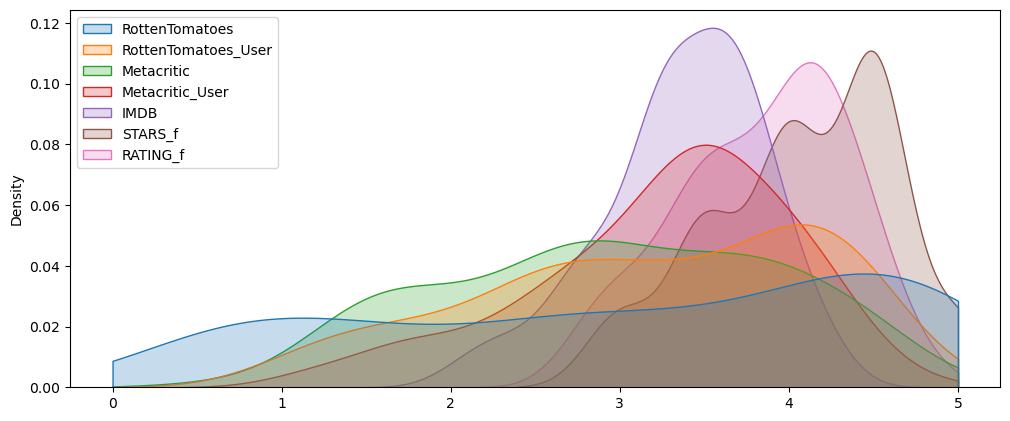

In [237]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
#credits to @mwaskom for the function -- legend object can be problematic in seaborn with distribution plots.


fig, ax = plt.subplots(figsize=(12,5), dpi=100)
sns.kdeplot(data=df_norm, clip=[0,5], shade=True, ax=ax);
move_legend(ax, "upper left")

It is now quite clear that Fandango has an uneven distribution as nearly all ratings (namely,stars) fall between 3 and 5 whereas other websites' ratings are more or less uniform.  We can also see that RottenTomatoes critics have the most uniform distribution - below is a direct comparison of RottenTomatoes critics and Fandango stars.


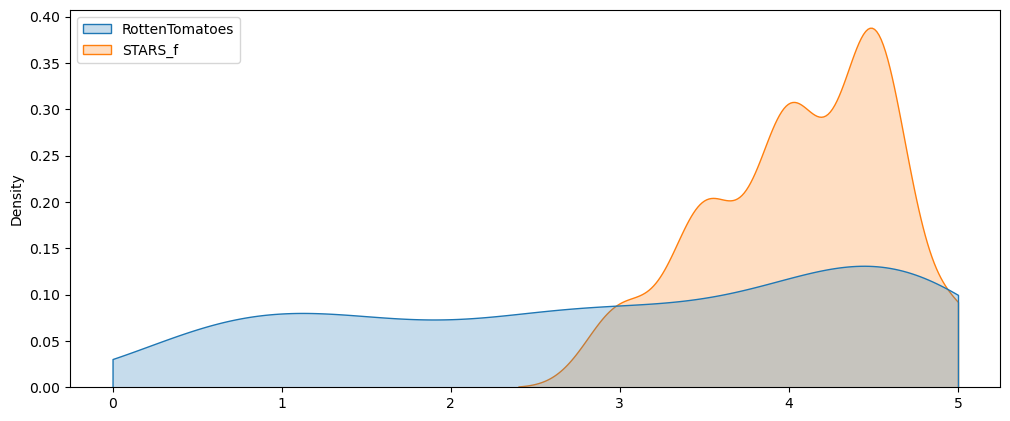

In [238]:
fig, ax = plt.subplots(figsize=(12,5), dpi=100)
sns.kdeplot(data=df_norm[["RottenTomatoes","STARS_f"]], clip=[0,5], shade=True, ax=ax);
move_legend(ax, "upper left")

Another visualization option would be to use a heatmap.

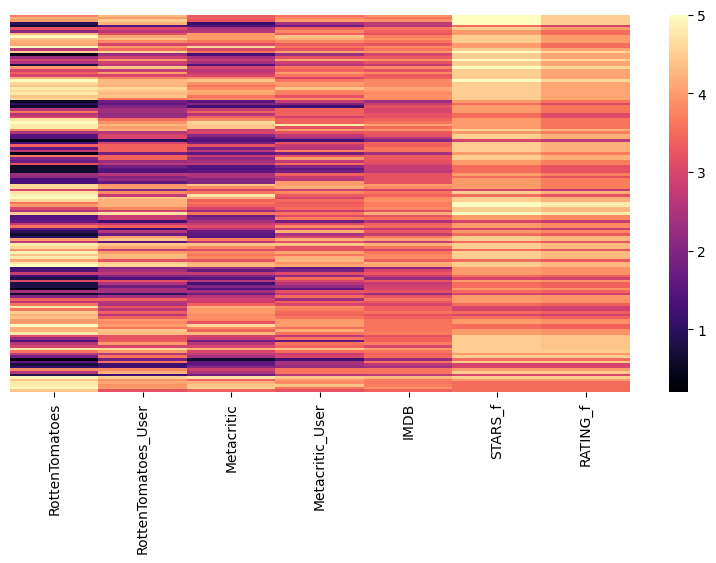

In [227]:
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(data=df_norm,cmap="magma",yticklabels=False);

As expected, there is no "dark" area in Fandango ratings - even on the movies in which the majority of the audience agrees that movie was not enjoyable. This is another clue that ratings to have been "pumped".

----